### Language Modeling With an RNN
Data:<br>
https://www.kaggle.com/competitions/nlp-getting-started
### Data preparation, exploration, visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

save_fig = True

In [2]:
# load data
train = pd.read_csv('drive/MyDrive/input/nlp-getting-started/train.csv')
test = pd.read_csv('drive/MyDrive/input/nlp-getting-started/test.csv')

In [3]:
# examine train
print('train shape:', train.shape)
train.head()

train shape: (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# examine test
print('test shape:', test.shape)
test.head()

test shape: (3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


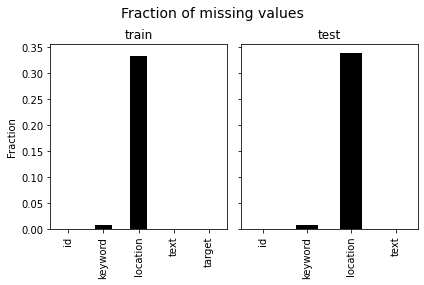


train:
id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

test:
id          0.000000
keyword     0.007968
location    0.338645
text        0.000000
dtype: float64


In [5]:
# fraction of missing values in train and test
fig, axs = plt.subplots(1,2, sharey=True, figsize=(6,4))
(train.isna().sum()/len(train)).plot(kind='bar', color='k', ax=axs[0])
(test.isna().sum()/len(test)).plot(kind='bar', color='k', ax=axs[1])
axs[0].set(title='train', ylabel='Fraction')
axs[1].set_title('test')
fig.tight_layout()
plt.suptitle('Fraction of missing values', fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()
print('\ntrain:')
print(train.isna().sum()/len(train))
print('\ntest:')
print(test.isna().sum()/len(test))

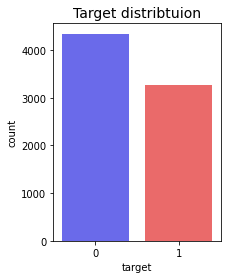

In [6]:
# distribution of target label
fig, ax = plt.subplots(figsize=(3,4))
sns.countplot(x='target', data=train, ax=ax, palette='seismic')
ax.set_title('Target distribtuion', fontsize=14)
plt.show()
if save_fig:
  fig.savefig('target.pdf', format='pdf', bbox_inches='tight')

In [7]:
# function to plot feature distributions by target label
def plot_feature(cols2plot):
  fig, axs = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=False)
  sns.kdeplot(data=train, x=cols2plot, hue='target', palette='seismic', 
              alpha=0.5, cut=0, fill=True, common_norm=True, ax=axs[0])
  sns.kdeplot(data=train, x=cols2plot, hue='target', palette='seismic', 
              alpha=0.5, cut=0, fill=True, common_norm=False, ax=axs[1])
  axs[0].set_title('Scaled by # samples')
  axs[1].set_title('Scaled independently')
  fig.tight_layout()
  fig.suptitle(f'Distribution of {cols2plot}', fontsize=14)
  plt.subplots_adjust(top=0.85)
  plt.show()
  if save_fig:
    fig.savefig(cols2plot+'.pdf', format='pdf', bbox_inches='tight')

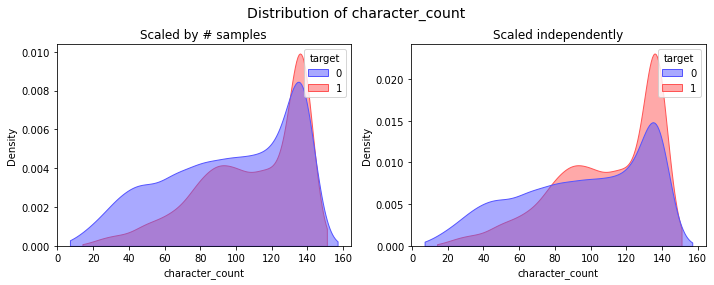

In [8]:
# distribution of character count (including spaces)
train['character_count'] = train['text'].str.len()
plot_feature('character_count')

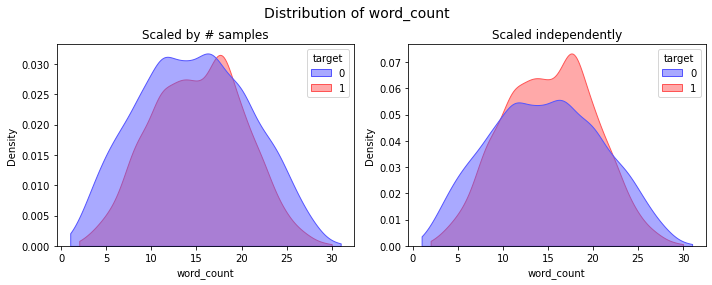

In [9]:
# distribution of word count
train['word_count'] = train['text'].apply(lambda x: len(x.split()))
plot_feature('word_count')

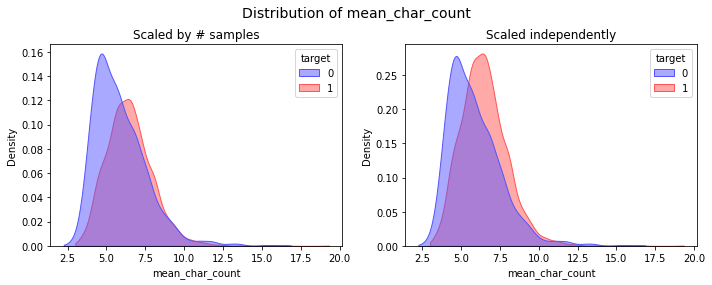

In [10]:
# distribution of character count per word 
def mean_char_count(xx):
    return np.mean([len(x) for x in xx.split()])

train['mean_char_count'] = train['text'].apply(mean_char_count)
plot_feature('mean_char_count')

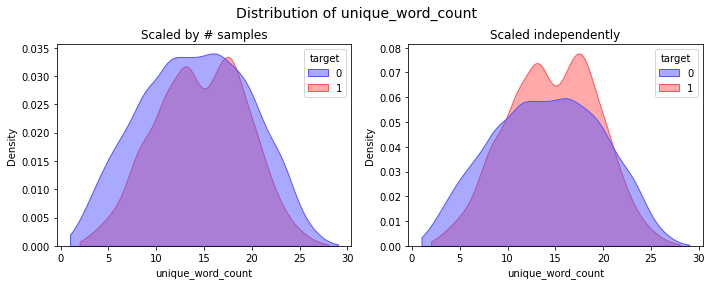

In [11]:
# distribution of unique word count
train['unique_word_count'] = train['text'].apply(lambda x: len(set(x.split())))
plot_feature('unique_word_count')

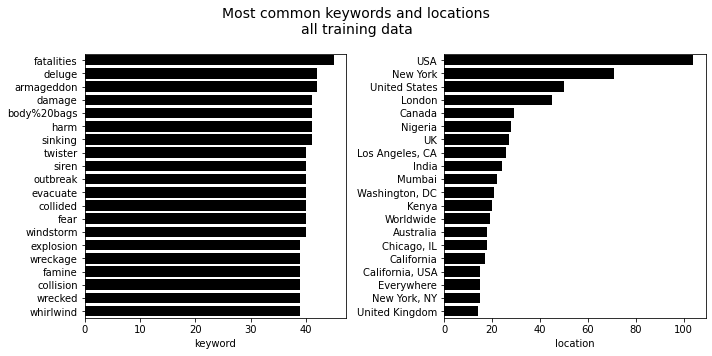

In [12]:
# examine most common keywords and locations
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.barplot(y=train['keyword'].value_counts()[:20].index, 
            x=train['keyword'].value_counts()[:20], color='k', ax=axs[0])
sns.barplot(y=train['location'].value_counts()[:20].index, 
            x=train['location'].value_counts()[:20], color='k', ax=axs[1])
fig.tight_layout()
fig.suptitle(f'Most common keywords and locations\nall training data', fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()
if save_fig:
  fig.savefig('keyword_location.pdf', format='pdf', bbox_inches='tight')

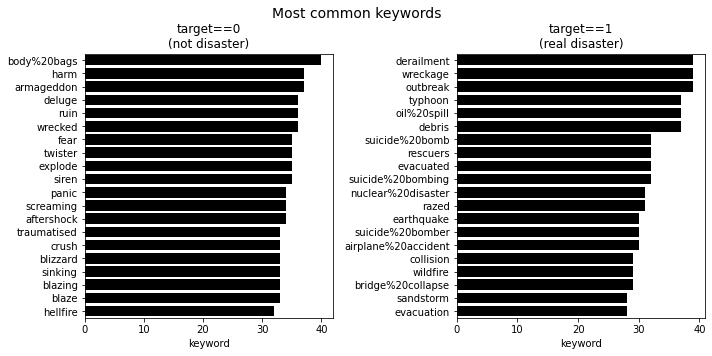

In [13]:
# examine most common keywords by target
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.barplot(y=train.loc[train['target']==0, 'keyword'].value_counts()[:20].index, 
            x=train.loc[train['target']==0, 'keyword'].value_counts()[:20], color='k', ax=axs[0])
sns.barplot(y=train.loc[train['target']==1, 'keyword'].value_counts()[:20].index, 
            x=train.loc[train['target']==1, 'keyword'].value_counts()[:20], color='k', ax=axs[1])
axs[0].set_title('target==0\n(not disaster)')
axs[1].set_title('target==1\n(real disaster)')
fig.tight_layout()
fig.suptitle(f'Most common keywords', fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()
if save_fig:
  fig.savefig('keyword_by_target.pdf', format='pdf', bbox_inches='tight')

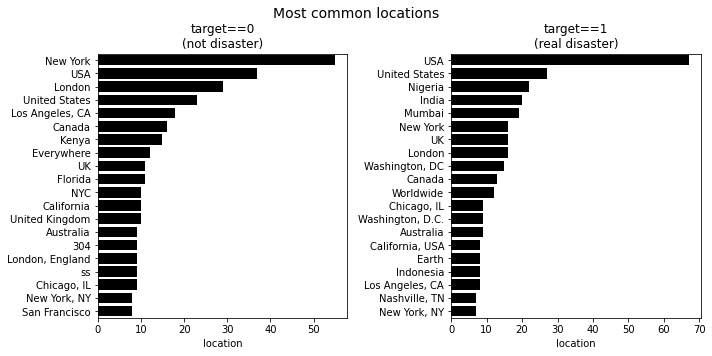

In [14]:
# examine most common locations by target
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.barplot(y=train.loc[train['target']==0, 'location'].value_counts()[:20].index, 
            x=train.loc[train['target']==0, 'location'].value_counts()[:20], color='k', ax=axs[0])
sns.barplot(y=train.loc[train['target']==1, 'location'].value_counts()[:20].index, 
            x=train.loc[train['target']==1, 'location'].value_counts()[:20], color='k', ax=axs[1])
axs[0].set_title('target==0\n(not disaster)')
axs[1].set_title('target==1\n(real disaster)')
fig.tight_layout()
fig.suptitle(f'Most common locations', fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()
if save_fig:
  fig.savefig('location_by_target.pdf', format='pdf', bbox_inches='tight')

In [15]:
# number of duplicated text with more than 1 label
print('# of duplicated text with >1 label: {}'.format(np.sum(train.groupby('text')['target'].nunique()>1)))
# number of samples
train['mislabeled'] = train.groupby('text')['target'].transform('nunique')>1
print('affected # samples: {}'.format(len(train[train['mislabeled']])))
print('example of same text with different target label:')
train[train['mislabeled']].head(4)[['id', 'keyword', 'text', 'target']]

# of duplicated text with >1 label: 18
affected # samples: 55
example of same text with different target label:


,id,keyword,text,target
610,881,bioterrorism,To fight bioterrorism sir.,1
624,898,bioterrorism,To fight bioterrorism sir.,0
630,907,bioterrorism,To fight bioterrorism sir.,1
634,916,bioterrorism,To fight bioterrorism sir.,0


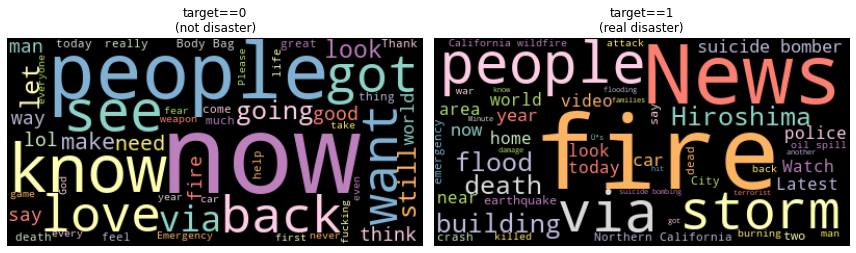

In [16]:
# word cloud visualization of top (50) words in tweets
alltext0 = ' '.join(xx for xx in train.loc[train['target']==0, 'text'])
alltext1 = ' '.join(xx for xx in train.loc[train['target']==1, 'text'])

# stopword list
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'amp', 'will', 'new', 'one', 'time', 'day'])

# word cloud image, excluding stopwords
fig, axs = plt.subplots(1,2, figsize=(12,6))
wordcloud = WordCloud(max_words=50, stopwords=stopwords, colormap='Set3', 
                      background_color='black', min_word_length=3).generate(alltext0)
axs[0].imshow(wordcloud, interpolation='bilinear')
wordcloud = WordCloud(max_words=50, stopwords=stopwords, colormap='Set3', 
                      background_color='black', min_word_length=3).generate(alltext1)
axs[1].imshow(wordcloud, interpolation='bilinear')
axs[0].set_title('target==0\n(not disaster)')
axs[1].set_title('target==1\n(real disaster)')
for ax in axs:
  ax.axis('off')
fig.tight_layout()
plt.show()
if save_fig:
  fig.savefig('word_cloud.pdf', format='pdf', bbox_inches='tight')